In [1]:
import wbdata as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import wbgapi as wg
import plotly.graph_objects as go
%matplotlib inline

In [2]:
print(wb.get_source(source_id=12))
print("\n --------------------------------\n")
print(wb.get_incomelevel())
print("\n --------------------------------\n")

  id  name
----  --------------------
  12  Education Statistics

 --------------------------------

id    value
----  -------------------
HIC   High income
INX   Not classified
LIC   Low income
LMC   Lower middle income
LMY   Low & middle income
MIC   Middle income
UMC   Upper middle income

 --------------------------------



we will select high income countries since they are able to afford the services we provide

In [3]:
wb.get_indicator(source=12)

id                              name
------------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
BAR.NOED.1519.FE.ZS             Barro-Lee: Percentage of female population age 15-19 with no education
BAR.NOED.1519.ZS                Barro-Lee: Percentage of population age 15-19 with no education
BAR.NOED.15UP.FE.ZS             Barro-Lee: Percentage of female population age 15+ with no education
BAR.NOED.15UP.ZS                Barro-Lee: Percentage of population age 15+ with no education
BAR.NOED.2024.FE.ZS             Barro-Lee: Percentage of female population age 20-24 with no education
BAR.NOED.2024.ZS                Barro-Lee: Percentage of population age 20-24 with no education
BAR.NOED.2529.FE.ZS             Barro-Lee: Percentage of female population age 25-29 with no education
BAR.N

In [4]:
dict1 = {}
for i in list(wb.get_indicator(source=12)):
  dict1[i['id']] = i['name']
dict1 

{'BAR.NOED.1519.FE.ZS': 'Barro-Lee: Percentage of female population age 15-19 with no education',
 'BAR.NOED.1519.ZS': 'Barro-Lee: Percentage of population age 15-19 with no education',
 'BAR.NOED.15UP.FE.ZS': 'Barro-Lee: Percentage of female population age 15+ with no education',
 'BAR.NOED.15UP.ZS': 'Barro-Lee: Percentage of population age 15+ with no education',
 'BAR.NOED.2024.FE.ZS': 'Barro-Lee: Percentage of female population age 20-24 with no education',
 'BAR.NOED.2024.ZS': 'Barro-Lee: Percentage of population age 20-24 with no education',
 'BAR.NOED.2529.FE.ZS': 'Barro-Lee: Percentage of female population age 25-29 with no education',
 'BAR.NOED.2529.ZS': 'Barro-Lee: Percentage of population age 25-29 with no education',
 'BAR.NOED.25UP.FE.ZS': 'Barro-Lee: Percentage of female population age 25+ with no education',
 'BAR.NOED.25UP.ZS': 'Barro-Lee: Percentage of population age 25+ with no education',
 'BAR.NOED.3034.FE.ZS': 'Barro-Lee: Percentage of female population age 30-34 

In [ ]:
dict1['SE.TER.ENRL']='Enrolment in tertiary education, all programmes, both sexes (number)'
dict1['UIS.E.3']='Enrolment in upper secondary education, both sexes (number)'
dict1['UIS.XGDP.56.FSGOV']='Government expenditure on tertiary education as % of GDP (%)'
dict1['UIS.XGDP.3.FSGOV']='Government expenditure on upper secondary education as a percentage of GDP (%)'
dict1['SE.XPD.TOTL.GD.ZS']='Government expenditure on education, total (% of GDP)'

In [48]:
#creating a dataframe of our indicators and their definitions
df = pd.DataFrame(dict1,index=range(len(dict1)))
df.head()

,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.15UP.FE.ZS,BAR.NOED.15UP.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.NOED.2529.FE.ZS,BAR.NOED.2529.ZS,BAR.NOED.25UP.FE.ZS,BAR.NOED.25UP.ZS,...,UIS.YEARS.FC.FREE.02,UIS.YEARS.FC.FREE.1T3,UIS.YR.END.01T5,UIS.YR.END.6T8,UIS.YR.END.MON.01T5,UIS.YR.END.MON.6T8,UIS.YR.ST.01T5,UIS.YR.ST.6T8,UIS.YR.ST.MON.01T5,UIS.YR.ST.MON.6T8
0,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15-19 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15+ wi...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 20-24 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25-29 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25+ wi...,...,Number of years of free pre-primary education ...,Number of years of free primary and secondary ...,End of the academic school year (pre-primary t...,End of the academic school year (tertiary educ...,End month of the academic school year (pre-pri...,End month of the academic school year (tertiar...,Start of the academic school year (pre-primary...,Start of the academic school year (tertiary ed...,Start month of the academic school year (pre-p...,Start month of the academic school year (terti...
1,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15-19 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15+ wi...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 20-24 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25-29 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25+ wi...,...,Number of years of free pre-primary education ...,Number of years of free primary and secondary ...,End of the academic school year (pre-primary t...,End of the academic school year (tertiary educ...,End month of the academic school year (pre-pri...,End month of the academic school year (tertiar...,Start of the academic school year (pre-primary...,Start of the academic school year (tertiary ed...,Start month of the academic school year (pre-p...,Start month of the academic school year (terti...
2,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15-19 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15+ wi...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 20-24 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25-29 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25+ wi...,...,Number of years of free pre-primary education ...,Number of years of free primary and secondary ...,End of the academic school year (pre-primary t...,End of the academic school year (tertiary educ...,End month of the academic school year (pre-pri...,End month of the academic school year (tertiar...,Start of the academic school year (pre-primary...,Start of the academic school year (tertiary ed...,Start month of the academic school year (pre-p...,Start month of the academic school year (terti...
3,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15-19 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 15+ wi...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 20-24 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25-29 ...,Barro-Lee: Percentage of female population age...,Barro-Lee: Percentage of population age 25+ wi...,...,Number of years of free pre-primary education ...,Number of years of free primary and secondary ...,End of 

In [49]:
df0 = df.melt(var_name='Id',value_name='Value')
df0.head()
print(df0.shape)

(19368801, 2)


In [50]:
df0.duplicated().sum()

19364400

In [51]:
df1 = df0.drop_duplicates()
df1.head()

,Id,Value
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...
4401,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...
8802,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...
13203,BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ wi...
17604,BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age...


In [53]:
df1[df1['Value']=='Government expenditure on education, total (% of GDP)']

,Id,Value
9316917,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ..."


In [54]:
indicator_name = [ 'Proportion of population achieving at least a fixed level of proficiency in functional literacy skills both sexes (%)',
 'Youth literacy rate, population 15-24 years, both sexes (%)',
 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
 'Proportion of youth and adults who have connected and installed new devices (%)',
 'Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)',
 'Population growth (annual %)',
 'Population, ages 15-24, total',
 'School age population, post-secondary non-tertiary education, both sexes (number)',
 'School age population, upper secondary education, both sexes (number)',
 'Personal computers (per 100 people)',
 'Internet users (per 100 people)',
 'DHS: Secondary completion rate',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Enrolment in upper secondary education, both sexes (number)',
'Government expenditure on tertiary education as % of GDP (%)',
'Government expenditure on upper secondary education as a percentage of GDP (%)',
'Government expenditure on education, total (% of GDP)']

In [55]:
df1[df1['Value'].isin(indicator_name)]

,Id,Value
814185,BAR.SEC.CMPT.2024.ZS,Barro-Lee: Percentage of population age 20-24 ...
1703187,IT.CMP.PCMP.P2,Personal computers (per 100 people)
1707588,IT.NET.USER.P2,Internet users (per 100 people)
9224496,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
9316917,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ..."
9867042,SP.POP.1524.TO.UN,"Population, ages 15-24, total"
10232325,SP.POP.GROW,Population growth (annual %)
10329147,SP.SEC.UTOT.IN,"School age population, upper secondary educati..."
11768274,UIS.E.3,"Enrolment in upper secondary education, both s..."
13079772,UIS.ICTSKILLCONNEC,Proportion of youth and adults who have connec...


In [56]:
print(df1[df1['Value'].isin(indicator_name)].shape)
print(len(indicator_name))

(14, 2)
17


In [57]:
df2 = df1[df1['Value'].isin(indicator_name)]

In [58]:
d = {}
for i,v in list(zip(df2['Id'],df2['Value'])):
    d[i] = v
d

{'BAR.SEC.CMPT.2024.ZS': 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
 'IT.CMP.PCMP.P2': 'Personal computers (per 100 people)',
 'IT.NET.USER.P2': 'Internet users (per 100 people)',
 'SE.TER.ENRL': 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'SE.XPD.TOTL.GD.ZS': 'Government expenditure on education, total (% of GDP)',
 'SP.POP.1524.TO.UN': 'Population, ages 15-24, total',
 'SP.POP.GROW': 'Population growth (annual %)',
 'SP.SEC.UTOT.IN': 'School age population, upper secondary education, both sexes (number)',
 'UIS.E.3': 'Enrolment in upper secondary education, both sexes (number)',
 'UIS.ICTSKILLCONNEC': 'Proportion of youth and adults who have connected and installed new devices (%)',
 'UIS.ICTSKILLPROGLANG': 'Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)',
 'UIS.SAP.4': 'School age population, post-secondary non-tertiary education

In [59]:
countries = ['GBR','FRA','DEU','CAN','USA','AUS','NZL','JPN','IND']

In [61]:
import datetime as dt

In [63]:
data = wg.data.DataFrame(d,countries,time = range(2013,2020),db = 12)

In [64]:
data

YR2013        YR2014        YR2015  \
economy series                                                           
AUS     BAR.SEC.CMPT.2024.ZS           NaN           NaN           NaN   
        IT.CMP.PCMP.P2                 NaN           NaN           NaN   
        IT.NET.USER.P2        8.345350e+01  8.400000e+01  8.456052e+01   
        SE.TER.ENRL                    NaN           NaN  1.903454e+06   
        SE.XPD.TOTL.GD.ZS     5.229740e+00  5.164770e+00  5.311270e+00   
...                                    ...           ...           ...   
USA     UIS.ICTSKILLCONNEC             NaN           NaN           NaN   
        UIS.ICTSKILLPROGLANG           NaN           NaN           NaN   
        UIS.SAP.4             4.314237e+06  4.274351e+06  4.215712e+06   
        UIS.XGDP.3.FSGOV      8.887200e-01  8.748100e-01  8.743300e-01   
        UIS.XGDP.56.FSGOV     1.342580e+00  1.364590e+00  1.365990e+00   

                                    YR2016        YR2017     YR2018  YR2019  
economy series                                                               
AUS     BAR.SEC.CMPT.2024.ZS           NaN           NaN        NaN     NaN  
        IT.CMP.PCMP.P2                 NaN           NaN        NaN     NaN  
        IT.NET.USER.P2        8.654000e+01  8.654505e+01        NaN     NaN  
        SE.TER.ENRL           1.918625e+06  1.774852e+06  1677242.0     NaN  
        SE.XPD.TOTL.GD.ZS     5.276780e+00  5.124250e+00        NaN     NaN  
...                                    ...           ...        ...     ...  
USA     UIS.ICTSKILLCONNEC             NaN           NaN        NaN     NaN  
        UIS.ICTSKILLPROGLANG           NaN           NaN        NaN     NaN  
        UIS.SAP.4             4.200707e+06  4.237906e+06  4246397.0     NaN  
        UIS.XGDP.3.FSGOV      8.716500e-01  8.921700e-01        NaN     NaN  
        UIS.XGDP.56.FSGOV     1.210820e+00  1.454850e+00        NaN     NaN  

[126 rows x 7 columns]

In [65]:
data.isnull().sum()

YR2013     47
YR2014     42
YR2015     47
YR2016     53
YR2017     48
YR2018     79
YR2019    108
dtype: int64

In [69]:
data.columns = [re.sub('YR','',i) for i in data.columns]
data

2013          2014          2015  \
economy series                                                           
AUS     BAR.SEC.CMPT.2024.ZS           NaN           NaN           NaN   
        IT.CMP.PCMP.P2                 NaN           NaN           NaN   
        IT.NET.USER.P2        8.345350e+01  8.400000e+01  8.456052e+01   
        SE.TER.ENRL                    NaN           NaN  1.903454e+06   
        SE.XPD.TOTL.GD.ZS     5.229740e+00  5.164770e+00  5.311270e+00   
...                                    ...           ...           ...   
USA     UIS.ICTSKILLCONNEC             NaN           NaN           NaN   
        UIS.ICTSKILLPROGLANG           NaN           NaN           NaN   
        UIS.SAP.4             4.314237e+06  4.274351e+06  4.215712e+06   
        UIS.XGDP.3.FSGOV      8.887200e-01  8.748100e-01  8.743300e-01   
        UIS.XGDP.56.FSGOV     1.342580e+00  1.364590e+00  1.365990e+00   

                                      2016          2017       2018  2019  
economy series                                                             
AUS     BAR.SEC.CMPT.2024.ZS           NaN           NaN        NaN   NaN  
        IT.CMP.PCMP.P2                 NaN           NaN        NaN   NaN  
        IT.NET.USER.P2        8.654000e+01  8.654505e+01        NaN   NaN  
        SE.TER.ENRL           1.918625e+06  1.774852e+06  1677242.0   NaN  
        SE.XPD.TOTL.GD.ZS     5.276780e+00  5.124250e+00        NaN   NaN  
...                                    ...           ...        ...   ...  
USA     UIS.ICTSKILLCONNEC             NaN           NaN        NaN   NaN  
        UIS.ICTSKILLPROGLANG           NaN           NaN        NaN   NaN  
        UIS.SAP.4             4.200707e+06  4.237906e+06  4246397.0   NaN  
        UIS.XGDP.3.FSGOV      8.716500e-01  8.921700e-01        NaN   NaN  
        UIS.XGDP.56.FSGOV     1.210820e+00  1.454850e+00        NaN   NaN  

[126 rows x 7 columns]

In [73]:
data = data.reset_index(level=['economy','series'])
data

,economy,series,2013,2014,2015,2016,2017,2018,2019
0,AUS,BAR.SEC.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,IT.NET.USER.P2,8.345350e+01,8.400000e+01,8.456052e+01,8.654000e+01,8.654505e+01,NaN,NaN
3,AUS,SE.TER.ENRL,NaN,NaN,1.903454e+06,1.918625e+06,1.774852e+06,1677242.0,NaN
4,AUS,SE.XPD.TOTL.GD.ZS,5.229740e+00,5.164770e+00,5.311270e+00,5.276780e+00,5.124250e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...
121,USA,UIS.ICTSKILLCONNEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,USA,UIS.ICTSKILLPROGLANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,USA,UIS.SAP.4,4.314237e+06,4.274351e+06,4.215712e+06,4.200707e+06,4.237906e+06,4246397.0,NaN
124,USA,UIS.XGDP.3.FSGOV,8.887200e-01,8.748100e-01,8.743300e-01,8.716500e-01,8.921700e-01,NaN,NaN


In [74]:
data_melt = data.melt(value_name='Value',id_vars=['economy','series'],var_name='Year')
data_melt.head()

,economy,series,Year,Value
0,AUS,BAR.SEC.CMPT.2024.ZS,2013,NaN
1,AUS,IT.CMP.PCMP.P2,2013,NaN
2,AUS,IT.NET.USER.P2,2013,83.453497
3,AUS,SE.TER.ENRL,2013,NaN
4,AUS,SE.XPD.TOTL.GD.ZS,2013,5.229740


In [75]:
data_pivot = data_melt.pivot(index=['economy','Year'],columns='series',values='Value')
data_pivot.head(4)

series        BAR.SEC.CMPT.2024.ZS  IT.CMP.PCMP.P2  IT.NET.USER.P2  \
economy Year                                                         
AUS     2013                   NaN             NaN       83.453497   
        2014                   NaN             NaN       84.000000   
        2015                   NaN             NaN       84.560519   
        2016                   NaN             NaN       86.540000   

series        SE.TER.ENRL  SE.XPD.TOTL.GD.ZS  SP.POP.1524.TO.UN  SP.POP.GROW  \
economy Year                                                                   
AUS     2013          NaN            5.22974          2926254.0     1.721151   
        2014          NaN            5.16477          2922207.0     1.491566   
        2015    1903454.0            5.31127          2914620.0     1.439217   
        2016    1918625.0            5.27678                NaN     1.561940   

series        SP.SEC.UTOT.IN    UIS.E.3  UIS.ICTSKILLCONNEC  \
economy Year                                                  
AUS     2013        597623.0        NaN                 NaN   
        2014        592693.0        NaN                 NaN   
        2015        586931.0  1300830.0                 NaN   
        2016        588196.0  1274134.0                 NaN   

series        UIS.ICTSKILLPROGLANG  UIS.SAP.4  UIS.XGDP.3.FSGOV  \
economy Year                                                      
AUS     2013                   NaN   295576.0           0.67613   
        2014                   NaN   293121.0           0.65781   
        2015                   NaN   290981.0           0.60446   
        2016                   NaN   292514.0           0.61398   

series        UIS.XGDP.56.FSGOV  
economy Year                     
AUS     2013            1.35703  
        2014            1.37066  
        2015            1.53259  
        2016            1.41548

In [77]:
data_pivot=data_pivot.reset_index(level=['economy','Year'])
data_pivot

series,economy,Year,BAR.SEC.CMPT.2024.ZS,IT.CMP.PCMP.P2,IT.NET.USER.P2,SE.TER.ENRL,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,SP.POP.GROW,SP.SEC.UTOT.IN,UIS.E.3,UIS.ICTSKILLCONNEC,UIS.ICTSKILLPROGLANG,UIS.SAP.4,UIS.XGDP.3.FSGOV,UIS.XGDP.56.FSGOV
0,AUS,2013,NaN,NaN,83.453497,NaN,5.22974,2926254.0,1.721151,597623.0,NaN,NaN,NaN,295576.0,0.67613,1.35703
1,AUS,2014,NaN,NaN,84.000000,NaN,5.16477,2922207.0,1.491566,592693.0,NaN,NaN,NaN,293121.0,0.65781,1.37066
2,AUS,2015,NaN,NaN,84.560519,1.903454e+06,5.31127,2914620.0,1.439217,586931.0,1.300830e+06,NaN,NaN,290981.0,0.60446,1.53259
3,AUS,2016,NaN,NaN,86.540000,1.918625e+06,5.27678,NaN,1.561940,588196.0,1.274134e+06,NaN,NaN,292514.0,0.61398,1.41548
4,AUS,2017,NaN,NaN,86.545049,1.774852e+06,5.12425,NaN,1.684523,590428.0,1.246502e+06,NaN,NaN,293662.0,0.63112,1.28691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,USA,2015,NaN,NaN,74.554202,1.953173e+07,NaN,45147517.0,0.730641,12526820.0,1.186838e+07,NaN,NaN,4215712.0,0.87433,1.36599
59,USA,2016,NaN,NaN,85.544421,1.928842e+07,NaN,NaN,0.716669,12641901.0,1.209397e+07,NaN,NaN,4200707.0,0.87165,1.21082
60,USA,2017,NaN,NaN,87.266113,1.901453e+07,NaN,NaN,0.631008,12676493.0,1.212759e+07,NaN,NaN,4237906.0,0.89217,1.45485
61,USA,2018,NaN,NaN,NaN,1.894197e+07,NaN,NaN,0.522337,12628095.0,1.218959e+07,NaN,NaN,4246397.0,NaN,NaN


In [78]:
data_pivot.columns.name 

'series'

In [79]:
data_pivot.columns.name = None

In [80]:
data_pivot.head()

,economy,Year,BAR.SEC.CMPT.2024.ZS,IT.CMP.PCMP.P2,IT.NET.USER.P2,SE.TER.ENRL,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,SP.POP.GROW,SP.SEC.UTOT.IN,UIS.E.3,UIS.ICTSKILLCONNEC,UIS.ICTSKILLPROGLANG,UIS.SAP.4,UIS.XGDP.3.FSGOV,UIS.XGDP.56.FSGOV
0,AUS,2013,NaN,NaN,83.453497,NaN,5.22974,2926254.0,1.721151,597623.0,NaN,NaN,NaN,295576.0,0.67613,1.35703
1,AUS,2014,NaN,NaN,84.000000,NaN,5.16477,2922207.0,1.491566,592693.0,NaN,NaN,NaN,293121.0,0.65781,1.37066
2,AUS,2015,NaN,NaN,84.560519,1903454.0,5.31127,2914620.0,1.439217,586931.0,1300830.0,NaN,NaN,290981.0,0.60446,1.53259
3,AUS,2016,NaN,NaN,86.540000,1918625.0,5.27678,NaN,1.561940,588196.0,1274134.0,NaN,NaN,292514.0,0.61398,1.41548
4,AUS,2017,NaN,NaN,86.545049,1774852.0,5.12425,NaN,1.684523,590428.0,1246502.0,NaN,NaN,293662.0,0.63112,1.28691


In [81]:
# data_pivot.to_csv('thinkproj.csv',index=False)

In [82]:
data_final = data_pivot.copy()
data_final['economy'].value_counts()

FRA    7
CAN    7
USA    7
DEU    7
JPN    7
IND    7
AUS    7
GBR    7
NZL    7
Name: economy, dtype: int64

In [83]:
data_final.isna().sum()

economy                  0
Year                     0
BAR.SEC.CMPT.2024.ZS    63
IT.CMP.PCMP.P2          63
IT.NET.USER.P2          15
SE.TER.ENRL             11
SE.XPD.TOTL.GD.ZS       35
SP.POP.1524.TO.UN       36
SP.POP.GROW              9
SP.SEC.UTOT.IN           8
UIS.E.3                 11
UIS.ICTSKILLCONNEC      58
UIS.ICTSKILLPROGLANG    46
UIS.SAP.4               15
UIS.XGDP.3.FSGOV        27
UIS.XGDP.56.FSGOV       27
dtype: int64

In [85]:
data_final[data_final['Year']=='2019']

,economy,Year,BAR.SEC.CMPT.2024.ZS,IT.CMP.PCMP.P2,IT.NET.USER.P2,SE.TER.ENRL,SE.XPD.TOTL.GD.ZS,SP.POP.1524.TO.UN,SP.POP.GROW,SP.SEC.UTOT.IN,UIS.E.3,UIS.ICTSKILLCONNEC,UIS.ICTSKILLPROGLANG,UIS.SAP.4,UIS.XGDP.3.FSGOV,UIS.XGDP.56.FSGOV
6,AUS,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595421.0,NaN,NaN,NaN,297380.0,NaN,NaN
13,CAN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175777.0,NaN,NaN,NaN,858075.0,NaN,NaN
20,DEU,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2505794.0,NaN,NaN,5.42742,2668033.0,NaN,NaN
27,FRA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2499172.0,NaN,NaN,5.70000,1685988.0,NaN,NaN
34,GBR,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2894158.0,NaN,NaN,8.90000,NaN,NaN,NaN
41,IND,2019,NaN,NaN,NaN,35148118.0,NaN,NaN,NaN,100948978.0,66756920.0,NaN,NaN,49740256.0,NaN,NaN
48,JPN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NZL,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179550.0,NaN,NaN,NaN,59994.0,NaN,NaN
62,USA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
data_final=data_final.rename(columns={'BAR.SEC.CMPT.2024.ZS': 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
 'IT.CMP.PCMP.P2': 'Personal computers (per 100 people)',
 'IT.NET.USER.P2': 'Internet users (per 100 people)',
 'SE.TER.ENRL': 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'SE.XPD.TOTL.GD.ZS': 'Government expenditure on education, total (% of GDP)',
 'SP.POP.1524.TO.UN': 'Population, ages 15-24, total',
 'SP.POP.GROW': 'Population growth (annual %)',
 'SP.SEC.UTOT.IN': 'School age population, upper secondary education, both sexes (number)',
 'UIS.E.3': 'Enrolment in upper secondary education, both sexes (number)',
 'UIS.ICTSKILLCONNEC': 'Proportion of youth and adults who have connected and installed new devices (%)',
 'UIS.ICTSKILLPROGLANG': 'Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)',
 'UIS.SAP.4': 'School age population, post-secondary non-tertiary education, both sexes (number)',
 'UIS.XGDP.3.FSGOV': 'Government expenditure on upper secondary education as a percentage of GDP (%)',
 'UIS.XGDP.56.FSGOV': 'Government expenditure on tertiary education as % of GDP (%)'})

In [89]:
data_final

,economy,Year,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary,Personal computers (per 100 people),Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
0,AUS,2013,NaN,NaN,83.453497,NaN,5.22974,2926254.0,1.721151,597623.0,NaN,NaN,NaN,295576.0,0.67613,1.35703
1,AUS,2014,NaN,NaN,84.000000,NaN,5.16477,2922207.0,1.491566,592693.0,NaN,NaN,NaN,293121.0,0.65781,1.37066
2,AUS,2015,NaN,NaN,84.560519,1.903454e+06,5.31127,2914620.0,1.439217,586931.0,1.300830e+06,NaN,NaN,290981.0,0.60446,1.53259
3,AUS,2016,NaN,NaN,86.540000,1.918625e+06,5.27678,NaN,1.561940,588196.0,1.274134e+06,NaN,NaN,292514.0,0.61398,1.41548
4,AUS,2017,NaN,NaN,86.545049,1.774852e+06,5.12425,NaN,1.684523,590428.0,1.246502e+06,NaN,NaN,293662.0,0.63112,1.28691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,USA,2015,NaN,NaN,74.554202,1.953173e+07,NaN,45147517.0,0.730641,12526820.0,1.186838e+07,NaN,NaN,4215712.0,0.87433,1.36599
59,USA,2016,NaN,NaN,85.544421,1.928842e+07,NaN,NaN,0.716669,12641901.0,1.209397e+07,NaN,NaN,4200707.0,0.87165,1.21082
60,USA,2017,NaN,NaN,87.266113,1.901453e+07,NaN,NaN,0.631008,12676493.0,1.212759e+07,NaN,NaN,4237906.0,0.89217,1.45485
61,USA,2018,NaN,NaN,NaN,1.894197e+07,NaN,NaN,0.522337,12628095.0,1.218959e+07,NaN,NaN,4246397.0,NaN,NaN


In [90]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   economy                                                                                                                    63 non-null     object 
 1   Year                                                                                                                       63 non-null     object 
 2   Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary                                0 non-null      float64
 3   Personal computers (per 100 people)                                                                                        0 non-nul

In [91]:
data_final.describe()

,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary,Personal computers (per 100 people),Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
count,0.0,0.0,48.000000,5.200000e+01,28.000000,2.700000e+01,54.000000,5.500000e+01,5.200000e+01,5.000000,17.000000,4.800000e+01,36.000000,36.000000
mean,NaN,NaN,79.435942,7.902485e+06,5.109066,3.694168e+07,0.821939,1.534117e+07,1.145177e+07,32.536520,6.714987,8.461058e+06,0.988890,1.326562
std,NaN,NaN,20.602066,1.100612e+07,0.931435,7.529308e+07,0.581670,3.273381e+07,2.093501e+07,24.494033,3.655371,1.693299e+07,0.262691,0.271869
min,NaN,NaN,15.100000,2.566083e+05,3.182180,6.150990e+05,-0.202670,1.795500e+05,2.359797e+05,5.688090,0.483530,5.999400e+04,0.604460,0.630790
25%,NaN,NaN,82.012601,1.750450e+06,4.888895,4.395025e+06,0.431084,8.867000e+05,1.473144e+06,5.837110,5.013810,2.952775e+05,0.792752,1.256985
50%,NaN,NaN,85.672211,2.506508e+06,5.197255,7.812258e+06,0.752107,2.505794e+06,2.681460e+06,49.047100,5.700000,1.600825e+06,0.890445,1.359530
75%,NaN,NaN,89.765366,3.862532e+06,5.536390,1.224194e+07,1.142305,3.065984e+06,4.234351e+06,49.098700,8.900000,4.204458e+06,1.262192,1.505000
max,NaN,NaN,94.896742,3.514812e+07,6.699980,2.441202e+08,2.122962,1.009490e+08,6.675692e+07,53.011600,14.066300,4.974026e+07,1.351900,1.692270


In [93]:
data_final.drop(['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary','Personal computers (per 100 people)'],axis=1,inplace=True)

In [95]:
data_final.to_csv('thinkdata.csv',index=False)

In [88]:
data_final = pd.read_csv('thinkdata.csv')

In [89]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,63.0,2.016000e+03,2.016065e+00,2013.00000,2.014000e+03,2.016000e+03,2.018000e+03,2.019000e+03
Internet users (per 100 people),48.0,7.943594e+01,2.060207e+01,15.10000,8.201260e+01,8.567221e+01,8.976537e+01,9.489674e+01
"Enrolment in tertiary education, all programmes, both sexes (number)",52.0,7.902485e+06,1.100612e+07,256608.26783,1.750450e+06,2.506508e+06,3.862532e+06,3.514812e+07
"Government expenditure on education, total (% of GDP)",28.0,5.109066e+00,9.314353e-01,3.18218,4.888895e+00,5.197255e+00,5.536390e+00,6.699980e+00
"Population, ages 15-24, total",27.0,3.694168e+07,7.529308e+07,615099.00000,4.395025e+06,7.812258e+06,1.224194e+07,2.441202e+08
Population growth (annual %),54.0,8.219386e-01,5.816702e-01,-0.20267,4.310840e-01,7.521070e-01,1.142305e+00,2.122962e+00
"School age population, upper secondary education, both sexes (number)",55.0,1.534117e+07,3.273381e+07,179550.00000,8.867000e+05,2.505794e+06,3.065984e+06,1.009490e+08
"Enrolment in upper secondary education, both sexes (number)",52.0,1.145177e+07,2.093501e+07,235979.70723,1.473144e+06,2.681460e+06,4.234351e+06,6.675692e+07
Proportion of youth and adults who have connected and installed new devices (%),5.0,3.253652e+01,2.449403e+01,5.68809,5.837110e+00,4.904710e+01,4.909870e+01,5.301160e+01
"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)",17.0,6.714987e+00,3.655371e+00,0.48353,5.013810e+00,5.700000e+00,8.900000e+00,1.406630e+01


In [99]:
norm_data = data_final.loc[:,'Internet users (per 100 people)':].apply(lambda x:(x-x.min())/(x.max()-x.min()))
norm_data

,Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
0,0.856595,NaN,0.582057,0.009491,0.827225,0.004149,NaN,NaN,NaN,0.004742,0.095887,0.684177
1,0.863444,NaN,0.563588,0.009475,0.728506,0.004100,NaN,NaN,NaN,0.004693,0.071377,0.697017
2,0.870468,0.047199,0.605233,0.009443,0.705996,0.004043,0.016008,NaN,NaN,0.004649,0.000000,0.849569
3,0.895275,0.047634,0.595429,NaN,0.758766,0.004055,0.015606,NaN,NaN,0.004680,0.012737,0.739241
4,0.895338,0.043513,0.552069,NaN,0.811475,0.004077,0.015191,NaN,NaN,0.004703,0.035668,0.618118
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.745071,0.552430,NaN,0.182881,0.401315,0.122530,0.174868,NaN,NaN,0.083649,0.361059,0.692618
59,0.882798,0.545457,NaN,NaN,0.395307,0.123672,0.178260,NaN,NaN,0.083347,0.357474,0.546435
60,0.904374,0.537607,NaN,NaN,0.358474,0.124015,0.178765,NaN,NaN,0.084096,0.384927,0.776331
61,NaN,0.535527,NaN,NaN,0.311746,0.123535,0.179697,NaN,NaN,0.084267,NaN,NaN


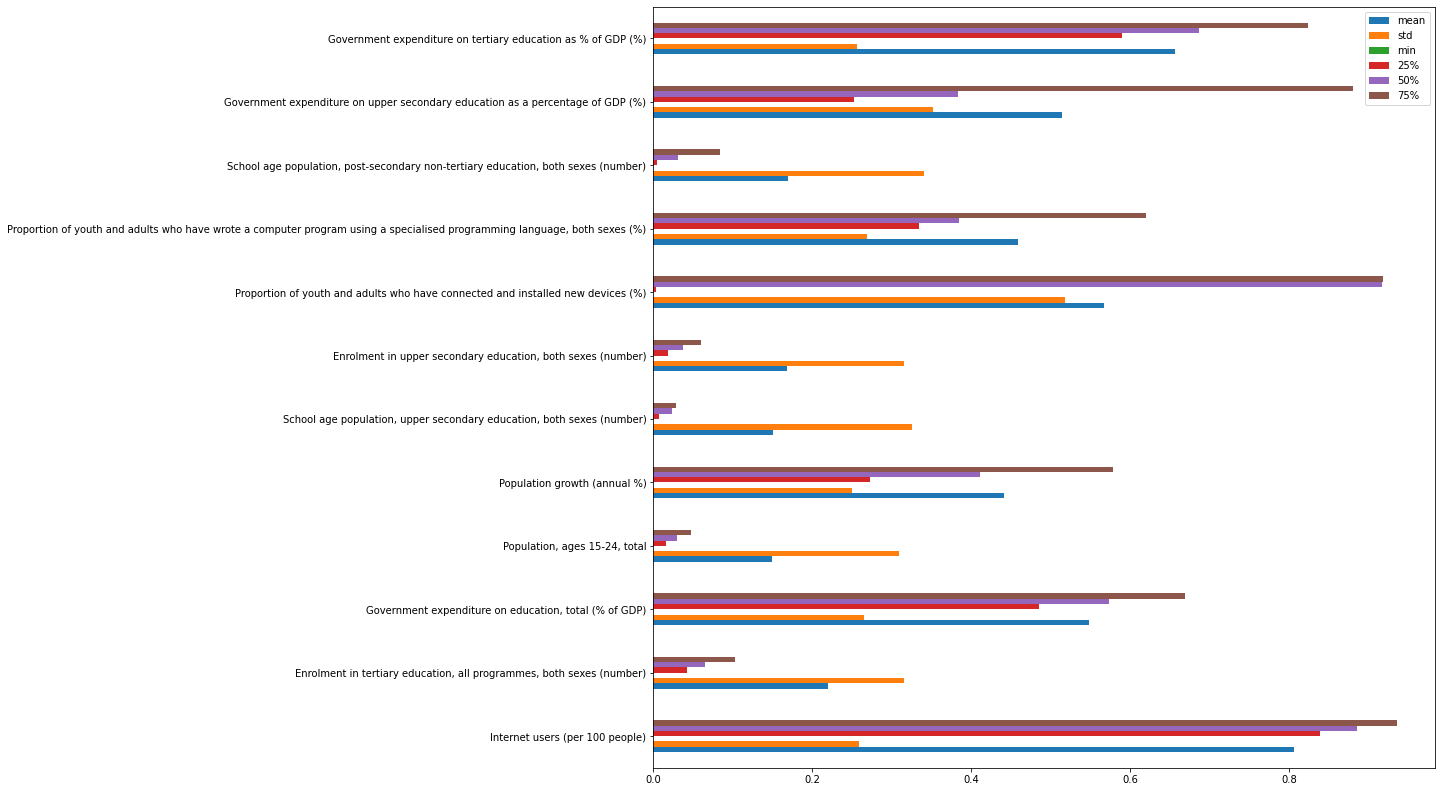

In [101]:
norm_data.describe().iloc[1:-1,:].T.plot(kind='barh',legend=True,figsize=[14,14]);

In [107]:
sc_data = data_final.loc[:,'Internet users (per 100 people)':].apply(lambda x:x/x.mean())
sc_data

,Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
0,1.050576,NaN,1.023620,0.079213,2.094015,0.038955,NaN,NaN,NaN,0.034934,0.683726,1.022967
1,1.057456,NaN,1.010903,0.079103,1.814693,0.038634,NaN,NaN,NaN,0.034644,0.665201,1.033242
2,1.064512,0.240868,1.039578,0.078898,1.751003,0.038259,0.113592,NaN,NaN,0.034391,0.611251,1.155309
3,1.089431,0.242788,1.032827,NaN,1.900313,0.038341,0.111261,NaN,NaN,0.034572,0.620878,1.067029
4,1.089495,0.224594,1.002972,NaN,2.049451,0.038486,0.108848,NaN,NaN,0.034707,0.638211,0.970109
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.938545,2.471593,NaN,1.222129,0.888924,0.816549,1.036379,NaN,NaN,0.498249,0.884153,1.029722
59,1.076898,2.440805,NaN,NaN,0.871926,0.824050,1.056079,NaN,NaN,0.496475,0.881443,0.912750
60,1.098572,2.406146,NaN,NaN,0.767707,0.826305,1.059014,NaN,NaN,0.500872,0.902194,1.096707
61,NaN,2.396963,NaN,NaN,0.635494,0.823150,1.064428,NaN,NaN,0.501875,NaN,NaN


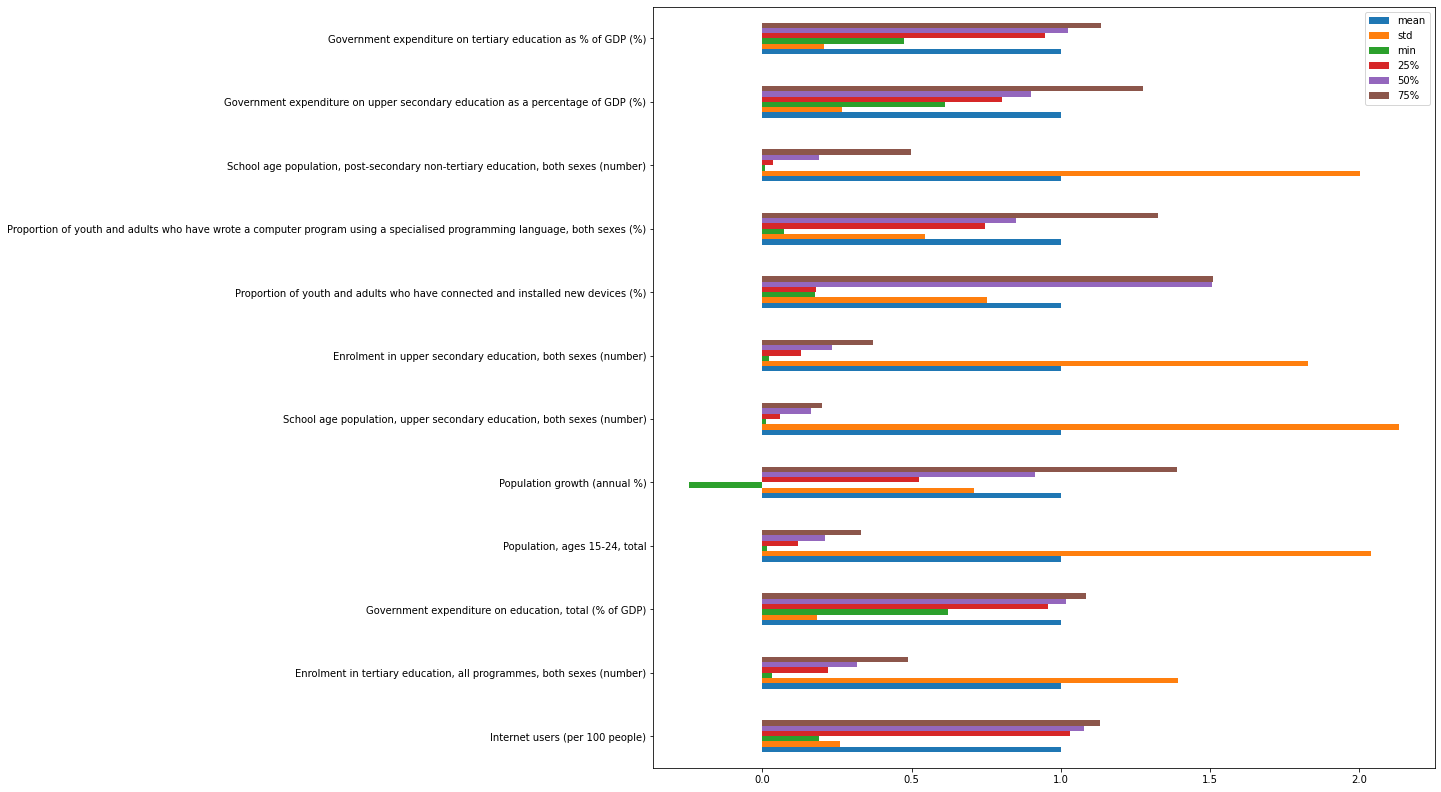

In [108]:
sc_data.describe().iloc[1:-1,:].T.plot(kind='barh',legend=True,figsize=[14,14]);

### Data Cleaning and Analysis

In [2]:
df = pd.read_csv('thinkdata.csv')
df.head()

,economy,Year,Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
0,AUS,2013,83.453497,NaN,5.22974,2926254.0,1.721151,597623.0,NaN,NaN,NaN,295576.0,0.67613,1.35703
1,AUS,2014,84.000000,NaN,5.16477,2922207.0,1.491566,592693.0,NaN,NaN,NaN,293121.0,0.65781,1.37066
2,AUS,2015,84.560519,1903454.0,5.31127,2914620.0,1.439217,586931.0,1300830.0,NaN,NaN,290981.0,0.60446,1.53259
3,AUS,2016,86.540000,1918625.0,5.27678,NaN,1.561940,588196.0,1274134.0,NaN,NaN,292514.0,0.61398,1.41548
4,AUS,2017,86.545049,1774852.0,5.12425,NaN,1.684523,590428.0,1246502.0,NaN,NaN,293662.0,0.63112,1.28691


In [7]:
df.set_index('Year').loc[2019,:].dropna(how='all')

,economy,Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
Year,,,,,,,,,,,,,
2019,AUS,NaN,NaN,NaN,NaN,NaN,595421.0,NaN,NaN,NaN,297380.0,NaN,NaN
2019,CAN,NaN,NaN,NaN,NaN,NaN,1175777.0,NaN,NaN,NaN,858075.0,NaN,NaN
2019,DEU,NaN,NaN,NaN,NaN,NaN,2505794.0,NaN,NaN,5.42742,2668033.0,NaN,NaN
2019,FRA,NaN,NaN,NaN,NaN,NaN,2499172.0,NaN,NaN,5.70000,1685988.0,NaN,NaN
2019,GBR,NaN,NaN,NaN,NaN,NaN,2894158.0,NaN,NaN,8.90000,NaN,NaN,NaN
2019,IND,NaN,35148118.0,NaN,NaN,NaN,100948978.0,66756920.0,NaN,NaN,49740256.0,NaN,NaN
2019,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NZL,NaN,NaN,NaN,NaN,NaN,179550.0,NaN,NaN,NaN,59994.0,NaN,NaN
2019,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1 = df[df.columns[2:]].dropna(how='all')
df1.tail()

,Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%)
57,73.000000,1.970022e+07,4.96174,45230846.0,0.727518,12486143.0,1.173632e+07,NaN,NaN,4274351.0,0.87481,1.36459
58,74.554202,1.953173e+07,NaN,45147517.0,0.730641,12526820.0,1.186838e+07,NaN,NaN,4215712.0,0.87433,1.36599
59,85.544421,1.928842e+07,NaN,NaN,0.716669,12641901.0,1.209397e+07,NaN,NaN,4200707.0,0.87165,1.21082
60,87.266113,1.901453e+07,NaN,NaN,0.631008,12676493.0,1.212759e+07,NaN,NaN,4237906.0,0.89217,1.45485
61,NaN,1.894197e+07,NaN,NaN,0.522337,12628095.0,1.218959e+07,NaN,NaN,4246397.0,NaN,NaN


In [28]:
df1[df.columns[:2]] = df[df.columns[:2]]

In [29]:
df1.tail()

,Internet users (per 100 people),"Enrolment in tertiary education, all programmes, both sexes (number)","Government expenditure on education, total (% of GDP)","Population, ages 15-24, total",Population growth (annual %),"School age population, upper secondary education, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Proportion of youth and adults who have connected and installed new devices (%),"Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)","School age population, post-secondary non-tertiary education, both sexes (number)",Government expenditure on upper secondary education as a percentage of GDP (%),Government expenditure on tertiary education as % of GDP (%),economy,Year
57,73.000000,1.970022e+07,4.96174,45230846.0,0.727518,12486143.0,1.173632e+07,NaN,NaN,4274351.0,0.87481,1.36459,USA,2014
58,74.554202,1.953173e+07,NaN,45147517.0,0.730641,12526820.0,1.186838e+07,NaN,NaN,4215712.0,0.87433,1.36599,USA,2015
59,85.544421,1.928842e+07,NaN,NaN,0.716669,12641901.0,1.209397e+07,NaN,NaN,4200707.0,0.87165,1.21082,USA,2016
60,87.266113,1.901453e+07,NaN,NaN,0.631008,12676493.0,1.212759e+07,NaN,NaN,4237906.0,0.89217,1.45485,USA,2017
61,NaN,1.894197e+07,NaN,NaN,0.522337,12628095.0,1.218959e+07,NaN,NaN,4246397.0,NaN,NaN,USA,2018


In [35]:
list(df1.columns)[::-1]

['Year',
 'economy',
 'Government expenditure on tertiary education as % of GDP (%)',
 'Government expenditure on upper secondary education as a percentage of GDP (%)',
 'School age population, post-secondary non-tertiary education, both sexes (number)',
 'Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)',
 'Proportion of youth and adults who have connected and installed new devices (%)',
 'Enrolment in upper secondary education, both sexes (number)',
 'School age population, upper secondary education, both sexes (number)',
 'Population growth (annual %)',
 'Population, ages 15-24, total',
 'Government expenditure on education, total (% of GDP)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Internet users (per 100 people)']

In [36]:
df1 = df1[list(df1.columns)[::-1]]
df1.tail()

,Year,economy,Government expenditure on tertiary education as % of GDP (%),Government expenditure on upper secondary education as a percentage of GDP (%),"School age population, post-secondary non-tertiary education, both sexes (number)","Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)",Proportion of youth and adults who have connected and installed new devices (%),"Enrolment in upper secondary education, both sexes (number)","School age population, upper secondary education, both sexes (number)",Population growth (annual %),"Population, ages 15-24, total","Government expenditure on education, total (% of GDP)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people)
57,2014,USA,1.36459,0.87481,4274351.0,NaN,NaN,1.173632e+07,12486143.0,0.727518,45230846.0,4.96174,1.970022e+07,73.000000
58,2015,USA,1.36599,0.87433,4215712.0,NaN,NaN,1.186838e+07,12526820.0,0.730641,45147517.0,NaN,1.953173e+07,74.554202
59,2016,USA,1.21082,0.87165,4200707.0,NaN,NaN,1.209397e+07,12641901.0,0.716669,NaN,NaN,1.928842e+07,85.544421
60,2017,USA,1.45485,0.89217,4237906.0,NaN,NaN,1.212759e+07,12676493.0,0.631008,NaN,NaN,1.901453e+07,87.266113
61,2018,USA,NaN,NaN,4246397.0,NaN,NaN,1.218959e+07,12628095.0,0.522337,NaN,NaN,1.894197e+07,NaN


#### let's check the country with the highest expenditure on education

In [51]:
tr = df1.set_index('economy')
tr.tail()

,Year,Government expenditure on tertiary education as % of GDP (%),Government expenditure on upper secondary education as a percentage of GDP (%),"School age population, post-secondary non-tertiary education, both sexes (number)","Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)",Proportion of youth and adults who have connected and installed new devices (%),"Enrolment in upper secondary education, both sexes (number)","School age population, upper secondary education, both sexes (number)",Population growth (annual %),"Population, ages 15-24, total","Government expenditure on education, total (% of GDP)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people)
economy,,,,,,,,,,,,,
USA,2014,1.36459,0.87481,4274351.0,NaN,NaN,1.173632e+07,12486143.0,0.727518,45230846.0,4.96174,1.970022e+07,73.000000
USA,2015,1.36599,0.87433,4215712.0,NaN,NaN,1.186838e+07,12526820.0,0.730641,45147517.0,NaN,1.953173e+07,74.554202
USA,2016,1.21082,0.87165,4200707.0,NaN,NaN,1.209397e+07,12641901.0,0.716669,NaN,NaN,1.928842e+07,85.544421
USA,2017,1.45485,0.89217,4237906.0,NaN,NaN,1.212759e+07,12676493.0,0.631008,NaN,NaN,1.901453e+07,87.266113
USA,2018,NaN,NaN,4246397.0,NaN,NaN,1.218959e+07,12628095.0,0.522337,NaN,NaN,1.894197e+07,NaN


In [62]:
tr0 = tr.groupby('Year').aggregate(max).iloc[:,9]
tr0.values

array([6.69998, 6.34445, 6.33739, 6.43335, 6.28367,     nan,     nan])

In [61]:
df1[df1['Government expenditure on education, total (% of GDP)'].isin(tr0.values[:-2])]

,Year,economy,Government expenditure on tertiary education as % of GDP (%),Government expenditure on upper secondary education as a percentage of GDP (%),"School age population, post-secondary non-tertiary education, both sexes (number)","Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)",Proportion of youth and adults who have connected and installed new devices (%),"Enrolment in upper secondary education, both sexes (number)","School age population, upper secondary education, both sexes (number)",Population growth (annual %),"Population, ages 15-24, total","Government expenditure on education, total (% of GDP)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people)
49,2013,NZL,1.69227,1.30047,64214.0,NaN,NaN,250053.11125,189157.0,0.768348,621736.0,6.69998,256608.26783,82.780000
50,2014,NZL,1.58286,1.26394,64034.0,NaN,NaN,249314.03314,188676.0,1.510339,618646.0,6.34445,260846.68022,85.500000
51,2015,NZL,1.62023,1.17190,63788.0,NaN,NaN,245255.35143,187893.0,1.889045,615099.0,6.33739,270074.21568,88.222889
52,2016,NZL,1.52699,1.16868,62911.0,NaN,NaN,241342.80080,185355.0,2.099357,NaN,6.43335,271450.72006,88.470186
53,2017,NZL,1.49767,1.12901,62046.0,NaN,NaN,239056.87607,182520.0,2.122962,NaN,6.28367,268645.65827,90.811093


#### Let's check the country with the highest number of internet users per 100 people

In [65]:
tr1 = tr.groupby('Year').aggregate(max).iloc[:,-1]
tr1.values

array([89.8441    , 91.61      , 92.0003    , 94.77580063, 94.62      ,
       94.89674176,         nan])

In [66]:
df1[df1['Internet users (per 100 people)'].isin(tr1.values[:-1])]

,Year,economy,Government expenditure on tertiary education as % of GDP (%),Government expenditure on upper secondary education as a percentage of GDP (%),"School age population, post-secondary non-tertiary education, both sexes (number)","Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%)",Proportion of youth and adults who have connected and installed new devices (%),"Enrolment in upper secondary education, both sexes (number)","School age population, upper secondary education, both sexes (number)",Population growth (annual %),"Population, ages 15-24, total","Government expenditure on education, total (% of GDP)","Enrolment in tertiary education, all programmes, both sexes (number)",Internet users (per 100 people)
28,2013,GBR,1.32486,1.34001,NaN,NaN,NaN,4.117193e+06,3082056.0,0.669741,7888589.0,5.52980,2.386199e+06,89.844100
29,2014,GBR,1.36203,1.30624,NaN,14.06630,53.0116,4.195081e+06,3049911.0,0.736464,7812258.0,5.59900,2.352933e+06,91.610000
30,2015,GBR,1.26796,1.35190,NaN,6.68020,NaN,4.039996e+06,3008963.0,0.792368,7731522.0,5.55616,2.330334e+06,92.000300
31,2016,GBR,1.39010,1.21969,NaN,8.49530,NaN,4.352158e+06,2959748.0,0.757874,NaN,5.42670,2.387280e+06,94.775801
32,2017,GBR,1.44957,1.14821,NaN,10.63142,NaN,3.758693e+06,2928800.0,0.679374,NaN,5.44209,2.431886e+06,94.620000
33,2018,GBR,NaN,NaN,NaN,NaN,NaN,3.553972e+06,2901850.0,0.605929,NaN,NaN,2.467086e+06,94.896742


### Visualization of different Indicators

In [118]:
fig = px.bar(data_frame=df1,y = 'economy',x='Enrolment in upper secondary education, both sexes (number)',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Enrolment in upper secondary education, both sexes (number)',
            hover_name='economy') 

fig

In [86]:
fig = px.bar(data_frame=df1,y = 'economy',x='Enrolment in tertiary education, all programmes, both sexes (number)',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Enrolment in tertiary education, all programmes, both sexes (number)',
            hover_name='economy') 
fig

In [85]:
fig = px.bar(data_frame=df1,y = 'economy',x='Government expenditure on education, total (% of GDP)',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Government expenditure on education, total (% of GDP)',
            hover_name='economy') 
fig

In [83]:
fig = px.bar(data_frame=df1,y = 'economy',x='Internet users (per 100 people)',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Internet users (per 100 people)',
            hover_name='economy') 
fig

In [84]:
fig = px.bar(data_frame=df1,y = 'economy',x='Population, ages 15-24, total',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Population, ages 15-24, total',
            hover_name='economy') 
fig

In [109]:
fig = px.bar(data_frame=df1,y = 'economy',x='Government expenditure on upper secondary education as a percentage of GDP (%)',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Government expenditure on upper secondary education as a percentage of GDP (%)',
            hover_name='economy') 
fig

In [110]:
fig = px.bar(data_frame=df1,y = 'economy',x='Government expenditure on tertiary education as % of GDP (%)',
             facet_row='Year',
             orientation='h',
             height=40*len(df1),
            title='Government expenditure on tertiary education as % of GDP (%)',
            hover_name='economy') 
fig

## Conclusion

We selected the most important indicators from the topid:`Education statistics`, where we encountered some difficulties, some indicators were no longer available and others were missing for the countries in focus. We ended up selecting 12 indicators.<p/>
We selected 6 countries based on their level of technology and how familiar the countries were with english. among the selected countries, only `India` was the only developing country. Germany and France, were the only countries where english was not Primary or secondary language.<p/>
After selecting countries and indicators, we created a dataframe containing 9 columns, which are the indicators, rows were countries and years.<p/>
<b>DATA ANALYSIS AND VISUALIZATION</b><br/>
•We found that `New Zealand` (NZ) has the highest GDP spent on education overall from 2013 to 2017.<br/>
•`Canada` (CAN) and `United Kingdom` (GBR) were the economies that spent the most on upper secondary education. <br/>
•On tertiary education; Canada was ahead in recent years.<br/>
•`India` has the largest population between 15-24 ages and also it has the highest population growth by a large margin.<br/>
•`United Kingdom`, `Canada` and `New Zealand` were among the most internet users across the years. where `India` was the economy with the least users relative to the others.<br/>
<p/>
<b>ISSUES</b> <br/>

The <u>`United States of America`</u> (USA) did not have enough data to be considered in our analysis, hence the ommision in our findings and comparisons.<p/>    

<b>OUR DECISION</b><br/>
Based on the analysis, the project should start in `Canada`, `United Kingdom` and `New Zealand`. Where the expansion will be based on how the project will perform in the selected countries.